In [43]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier,VotingClassifier
from sklearn.ensemble import VotingClassifier,StackingClassifier,BaggingClassifier
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline 


In [5]:
# load the data 
df = pd.read_csv(r"C:\Users\sandi\Downloads\wine.csv")
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
df["Type"].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

<AxesSubplot:>

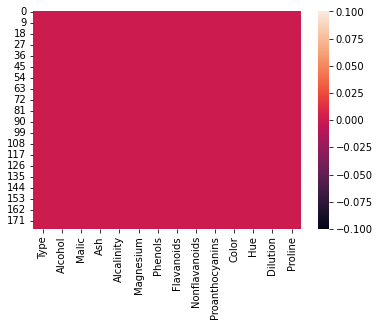

In [11]:
sns.heatmap(df.isna())

<AxesSubplot:>

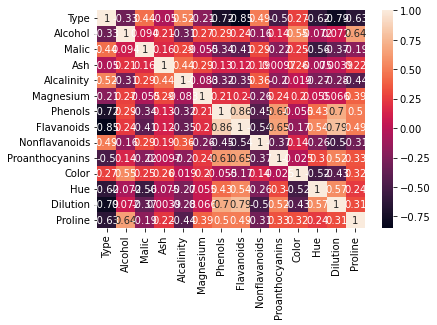

In [12]:
sns.heatmap(df.corr(),annot=True)

In [15]:
# define x and y

x = df.iloc[:,1:]
y = df['Type']

In [17]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [18]:
lg = LogisticRegression()

lg.fit(xtrain,ytrain)
ypred = lg.predict(xtest)
print(classification_report(ytest,ypred))
print('Train accuracy : ',lg.score(xtrain,ytrain))
print('Test accuracy : ',lg.score(xtest,ytest))

              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.87      1.00      0.93        13
           3       1.00      0.89      0.94         9

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.94        36
weighted avg       0.95      0.94      0.95        36

Train accuracy :  0.971830985915493
Test accuracy :  0.9444444444444444


In [19]:
# bagging Classifier 

In [20]:
bg = BaggingClassifier(DecisionTreeClassifier(),n_estimators=20)


In [21]:

bg.fit(xtrain,ytrain)
ypred = bg.predict(xtest)
print(classification_report(ytest,ypred))
print('Train accuracy : ',bg.score(xtrain,ytrain))
print('Test accuracy : ',bg.score(xtest,ytest))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       0.92      0.92      0.92        13
           3       1.00      0.89      0.94         9

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36

Train accuracy :  1.0
Test accuracy :  0.9444444444444444


In [22]:
def predict(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    print(classification_report(ytest,ypred))
    print('Train accuracy : ',model.score(xtrain,ytrain))
    print('Test accuracy : ',model.score(xtest,ytest))

In [23]:
predict(DecisionTreeClassifier())

              precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           2       0.80      0.92      0.86        13
           3       1.00      0.78      0.88         9

    accuracy                           0.89        36
   macro avg       0.91      0.88      0.89        36
weighted avg       0.90      0.89      0.89        36

Train accuracy :  1.0
Test accuracy :  0.8888888888888888


In [24]:
predict(BaggingClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=150))

              precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           2       0.92      0.92      0.92        13
           3       1.00      1.00      1.00         9

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.94      0.94      0.94        36

Train accuracy :  0.9929577464788732
Test accuracy :  0.9444444444444444


In [25]:
predict(RandomForestClassifier())

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36

Train accuracy :  1.0
Test accuracy :  0.9722222222222222


In [26]:
predict(KNeighborsClassifier())

              precision    recall  f1-score   support

           1       0.92      0.86      0.89        14
           2       0.56      0.69      0.62        13
           3       0.29      0.22      0.25         9

    accuracy                           0.64        36
   macro avg       0.59      0.59      0.59        36
weighted avg       0.63      0.64      0.63        36

Train accuracy :  0.823943661971831
Test accuracy :  0.6388888888888888


In [27]:
predict(BaggingClassifier(KNeighborsClassifier()))

              precision    recall  f1-score   support

           1       0.92      0.86      0.89        14
           2       0.56      0.69      0.62        13
           3       0.29      0.22      0.25         9

    accuracy                           0.64        36
   macro avg       0.59      0.59      0.59        36
weighted avg       0.63      0.64      0.63        36

Train accuracy :  0.8309859154929577
Test accuracy :  0.6388888888888888


# Boosting Classifier 

In [28]:
predict(AdaBoostClassifier())

              precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           2       0.71      0.92      0.80        13
           3       1.00      0.56      0.71         9

    accuracy                           0.83        36
   macro avg       0.88      0.80      0.81        36
weighted avg       0.87      0.83      0.83        36

Train accuracy :  0.9225352112676056
Test accuracy :  0.8333333333333334


In [29]:
predict(GradientBoostingClassifier(learning_rate=1))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36

Train accuracy :  1.0
Test accuracy :  0.9722222222222222


In [30]:
# k_fold cv

In [31]:
kf = KFold(n_splits=10)
score = cross_val_score(GradientBoostingClassifier(),x,y,cv=kf)
score

array([0.94444444, 0.88888889, 0.94444444, 0.88888889, 0.83333333,
       1.        , 0.94444444, 0.83333333, 0.88235294, 1.        ])

In [32]:
score.mean()

0.9160130718954248

<AxesSubplot:xlabel='Type', ylabel='count'>

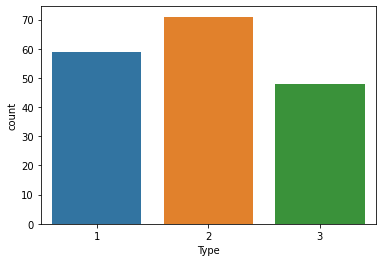

In [33]:
sns.countplot(df['Type'])

In [34]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [35]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [36]:
predict(XGBClassifier())

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36

Train accuracy :  1.0
Test accuracy :  0.9722222222222222


# voting and Stacking Classifier 

In [38]:
models = []

models.append(('lr',LogisticRegression()))
models.append(('dt',DecisionTreeClassifier()))
models.append(('dt1',DecisionTreeClassifier(criterion='entropy')))
models.append(('knn',KNeighborsClassifier()))
models.append(('rf',RandomForestClassifier()))

In [39]:
models

[('lr', LogisticRegression()),
 ('dt', DecisionTreeClassifier()),
 ('dt1', DecisionTreeClassifier(criterion='entropy')),
 ('knn', KNeighborsClassifier()),
 ('rf', RandomForestClassifier())]

In [40]:
predict(VotingClassifier(estimators=models))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36

Train accuracy :  1.0
Test accuracy :  0.9722222222222222


In [46]:
predict(StackingClassifier(estimators=models,final_estimator=RandomForestClassifier()))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36

Train accuracy :  1.0
Test accuracy :  0.9722222222222222
